# 딥러닝/인공신경망 이론



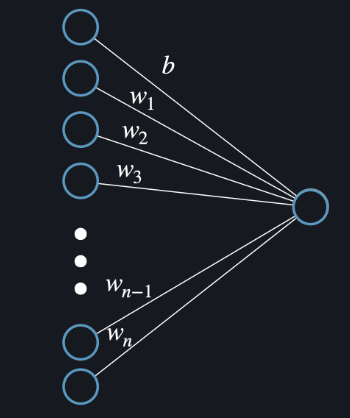
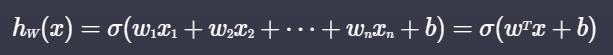
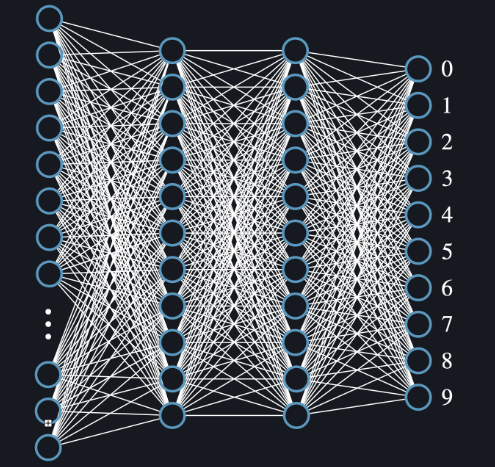

입력층에서 받은 데이터로 층층이 은닉층에서 학습해서 가중치(weight)와 편향(bias)를 개선해나가면서 출력층에서 최선의 결과를 출력함.

은닉층에서는 작은 패턴들을 찾아내서 다음 층의 인풋으로 사용해서 더 섬세하게 예측하게한다.

## 신경망 요소 표현 정리

## 층: L
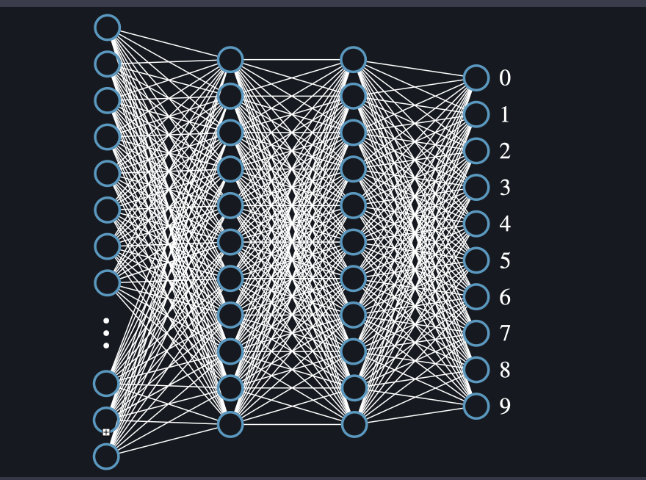
#### 위 신경망의 L = 3

## 출력: a
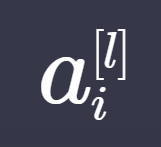
#### l번째 층의 i번째 뉴런의 출력을 나타냄.
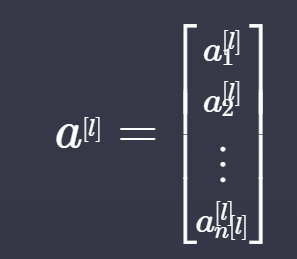
#### 벡터로 층에 해당하는 출력을 모두 나타낼 수 있음.

## 가중치:w
#### 가중치는 뒤에 층에 속한다고 생각함.

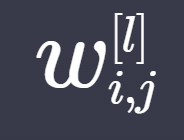
#### l번째 층의 i->j를 잇는 가중치
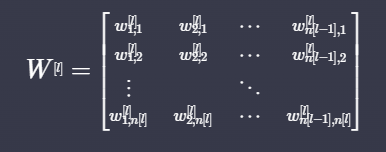
#### 벡터로 층에 해당하는 가중치를 모두 나타낼 수 있음.

## 편향:b
#### 편향은 하나의 뉴런에 귀속되기 때문에 출력처럼 표현함.

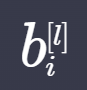
#### l번째 층의 i번째 편향
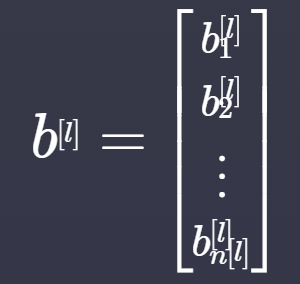
#### 벡터로 층에 해당하는 편향을 모두 나타낼 수 있음.


## 가중치와 편향 초기화 실습

In [5]:
# 필요한 도구 임포트
import numpy as np

# numpy 임의성 조절
np.random.seed(42)

def initialize_parameters(neurons_per_layer):
    """신경망의 가중치와 편향을 초기화해주는 함수"""
    L = len(neurons_per_layer)- 1  # 층 개수 저장
    parameters = {}
    
        # 1층 부터 L층까지 돌면서 가중치와 편향 초기화
    for l in range(1, L+1):
        parameters['W' + str(l)] = np.random.randn(neurons_per_layer[l],neurons_per_layer[l-1])\
        * np.sqrt(1 / neurons_per_layer[l])
        parameters['b' + str(l)] = np.random.randn(neurons_per_layer[l])\
        * np.sqrt(1 / neurons_per_layer[l])
    ##신경망의 가중치와 편향의 값들을 초기화할 때는, 
    ##값들의 표준 오차를 1 대신 그 층의 뉴런의 개수의 루트 값과 반비례 하는 값을 사용하는 경우가 많습니다.
    ##(신경망이 훨씬 더 빠르게, 잘 학습되기 때문입니다)
    return parameters

# 실행 코드
neurons_per_layer = [10, 5, 5, 3]
initialize_parameters(neurons_per_layer)



{'W1': array([[ 0.22213732, -0.06183368,  0.28965512,  0.68111966, -0.10471657,
         -0.10470923,  0.70624544,  0.34320724, -0.20995533,  0.24264023],
        [-0.20724669, -0.20828068,  0.10820882, -0.85564494, -0.77140671,
         -0.25146263, -0.45295185,  0.14053568, -0.40608071, -0.63160142],
        [ 0.65545806, -0.10097023,  0.03019953, -0.63716676, -0.24345536,
          0.04960609, -0.51473998,  0.16801726, -0.26861379, -0.13044941],
        [-0.26909138,  0.82836399, -0.00603614, -0.47302271,  0.36785327,
         -0.54597788,  0.09340664, -0.87639112, -0.59398286,  0.08803902],
        [ 0.33025229,  0.07663823, -0.05171948, -0.13465767, -0.66121514,
         -0.32192412, -0.20600392,  0.47275943,  0.15367077, -0.78845553]]),
 'b1': array([ 0.14493476, -0.17221403, -0.30272872,  0.27354995,  0.461077  ]),
 'W2': array([[ 0.41648113, -0.37530949, -0.13828398,  0.14814551,  0.43627704],
        [-0.21429323, -0.08302922, -0.49476804, -0.53495987,  0.36337259],
        [ 

# MNIST 데이터 표
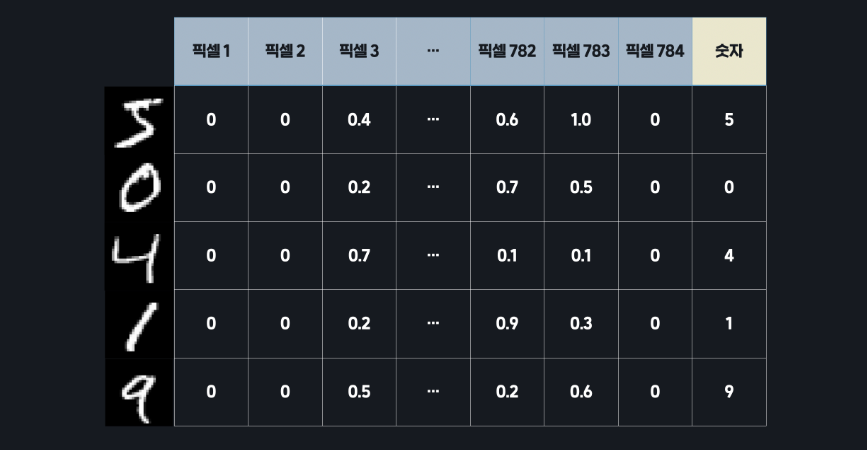

#### 입력변수(X) 나타내는 법:
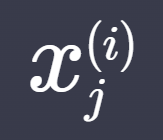
i번째 행의 j번째 열 데이터
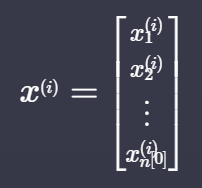
i번째 행의 데이터 벡터

#### 목표변수(y) 나타내는 법:
숫자의 대소를 의미하는게 아니기 때문에 one-hot encoding을 이용해서 나타냄.
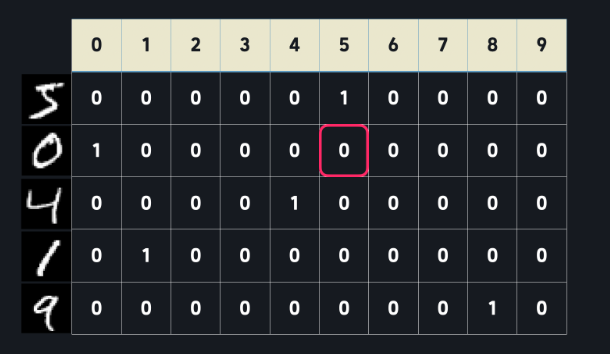
표현은 입력변수와 동일!

# 순전파

입력층에서 들어온 정보가 출력층까지 계산되는 과정.<br>
행렬연산으로 쉽게 이루어짐.
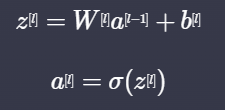
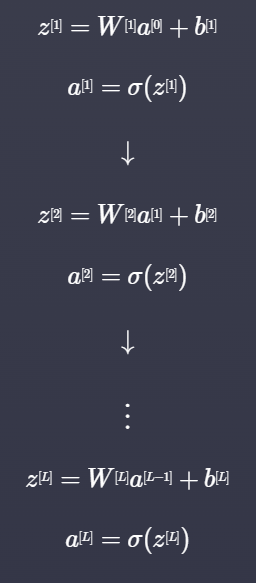

## 순전파 구현하기

```python

# 인공 신경망 구현에 사용할 라이브러리 임포트
import numpy as np
import pandas as pd

# numpy 임의성 조절
np.random.seed(42)

# 데이터 셋 가지고 오기
dataset = pd.read_csv('./data/MNIST_preprocessed.csv', sep=',', header=None).values

# 입력, 목표 변수 데이터 셋 나누기
X = dataset[:, 0:784]
Y = dataset[:, 784:]

# training, testing 데이터 셋 나누기
X_train, X_test = X[0:250,], X[250:,]
Y_train, Y_test = Y[0:250,], Y[250:,]

def sigmoid(x):
    """시그모이드 함수"""
    return 1/(1 + np.exp(-x))

def initialize_parameters(nodes_per_layer):
    """신경망의 가중치와 편향을 초기화해주는 함수"""
    L = len(nodes_per_layer) - 1  # 층 개수 저장
    parameters = {}
    
    # 1층 부터 L 층까지 돌면서 가중치와 편향 초기화
    for l in range(1, L+1):
        parameters['W' + str(l)] = np.random.randn(nodes_per_layer[l], nodes_per_layer[l-1]) * np.sqrt(1. / nodes_per_layer[l])
        parameters['b' + str(l)] = np.random.randn(nodes_per_layer[l]) * np.sqrt(1. / nodes_per_layer[l])
        
    return parameters

def feed_forward(x, parameters):
    """순전파 함수"""
    cache = {'a0': x}  # 0 번째 층 출력 저장
    L = len(parameters) // 2  # 층 수 저장
    
    for l in range(1, L+1):
        # 전 층 뉴런의 출력, 현재 층 뉴런들의 가중치, 편향 데이터를 가지고 온다. (코드를 쓰세요)
        a_prev = cache['a' + str(l-1)]
        W = parameters['w' + str(l)]
        b = parameters['b' + str(l)]
        
        # 가지고 온 데이터로 z와 a를 계산한다. (코드를 쓰세요)
        z = W@a_prev + b
        a = sigmoid(z)

        # 결과 값을 캐시에 저장한다.
        cache['z' + str(l)] = z
        cache['a' + str(l)] = a
                
    return a, cache

# 실행 코드
neurons_per_layer = [784, 128, 64, 10]
parameters = initialize_parameters(neurons_per_layer)
feed_forward(X_train[0], parameters)[0]

#결과값
array([ 0.39847348,  0.63079802,  0.79832892,  0.93056447,  0.67941405,
        0.67578969,  0.05318435,  0.37468117,  0.12677036,  0.6419338 ])

```

# 인공신경망 가설 함수와 손실 함수

## 가설함수:
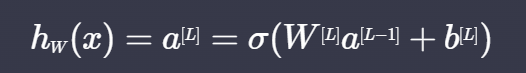
h는 벡터로 계산된다.

## 손실함수:
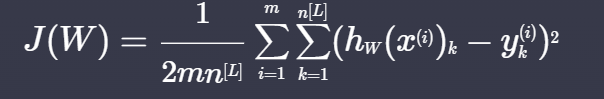
평균제곱오차를 통해서 구할 수 있다.

## 인공신경망에서의 경사하강법

인공신경망은 여러 층(Layer)으로 이루어져 있어서(복잡한 합성함수로 이루어졌기 때문에), 일반적인 회귀모델에서의 변수 업데이트에 비해 굉장히 복잡하다. 왜냐하면 하나의 변수가 업데이트 됐을 때, 해당 층의 다음층의 모든 출력값이 달라지기 때문이다. 

또한, 인공신경망의 손실함수는 아래로 볼록하지 않다. 여러개의 극소점들이 있기 때문에 최솟값보다 다른 극소점들을 찾을 가능성이 크다.

그럼에도 불구하고 경사하강법을 사용하는데, <br>
1. 첫번째 이유는 임의의 값에서 시작해도 손실을 줄일 수 있다. <br>
2. 두번째 이유는 극소점들에서 얻는 성능이 대부분 좋게 나오기 때문이다. <br>

손실함수가 볼록하지 않다는 문제점을 극복하기 위한 한가지 방법은, 임의로 편향값들을 초기화하고 여러 모델을 만들어서 가장 좋은 모델을 사용하는 것이다.

# 역전파

딥러닝은 여러개의 층으로 이루어져 있다. 이를 다르게 생각해보면 복잡한 합성함수로 이루어져 있다고 생각할 수 있다. 그렇기 때문에 우리는 역전파라는 방법을 이용한다. 

우리는 출력층에서 부터 차례대로 입력층으로 올라가면서 가중치와 편향을 구한다. 
1. 마지막층의 W와 b의 변화에 대한 손실함수의 편미분을 구한다. 이때, 연쇄법칙을 사용해야 한다. 

2. 이제 전층의 출력에 변화에 대한 손실함수의 편미분을 구해둔다. 왜냐하면 전층의 W와 b를 구할 때 편미분을 구해야 하는데, 이를 미리 구해두면 편리하기 때문이다. 

3. 전층의 W와 b에 변화 대한 손실함수의 편미분을 구한다. 2번과정에서의 값을 이용하면 된다.

4. 2~3 과정을 반복해서 1번째 층까지의 W와 b의 변화에 대한 손실함수의 편미분을 구해준다. 

각 데이터마다 각 층의 W, b의 변화에 대한 손실함수의 편미분을 구하고 평균을 구해서 손실함수의 경사를 구해서 변수를 업데이트 한다.

이렇게 하면 변수 업데이트가 1번 완료된 것 이다.

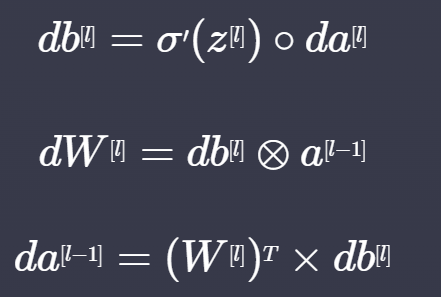

3가지 편미분 값을 이용해서 변수 업데이트 가능 (두번째는 외적 곱을 나타낸다.)

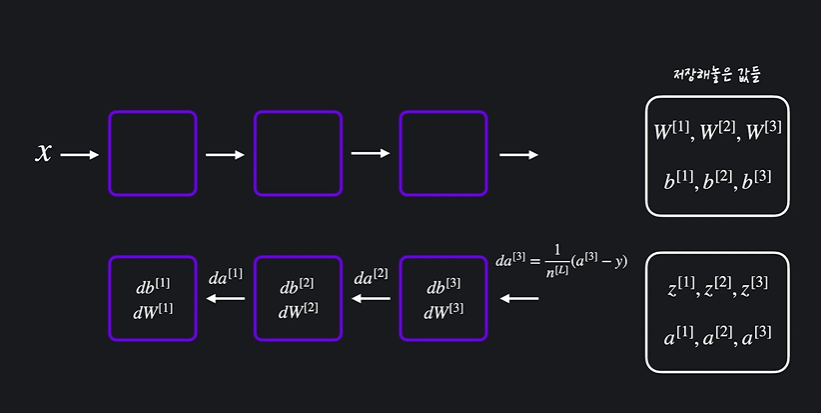

# 역전파 구현하기

```python
# 인공 신경망 구현에 사용할 라이브러리 임포트
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt

# numpy 임의성 조절
np.random.seed(42)

# 데이터 셋 가지고 오기
dataset = pd.read_csv('./data/MNIST_preprocessed.csv', sep=',', header=None).values

# 입력, 목표 변수 데이터 셋 나누기
X = dataset[:, 0:784]
Y = dataset[:, 784:]

# training, testing 데이터 셋 나누기
X_train, X_test = X[0:250,], X[250:,]
Y_train, Y_test = Y[0:250,], Y[250:,]

def sigmoid(x):
    """시그모이드 함수"""
    return 1/(1 + np.exp(-x))

def d_sigmoid(x):
    """시그모이드 미분 함수"""
    return (np.exp(-x))/((np.exp(-x)+1)**2)

def initialize_parameters(neurons_per_layer):
    """신경망의 가중치와 편향을 초기화해주는 함수"""
    L = len(neurons_per_layer) - 1  # 입력층을 포함함 층 개수 저장
    parameters = {}
    
    # 1층 부터 L 층까지 돌면서 가중치와 편향 초기화
    for l in range(1, L+1):
        parameters['W' + str(l)] = np.random.randn(neurons_per_layer[l], neurons_per_layer[l-1]) * np.sqrt(1. / neurons_per_layer[l])
        parameters['b' + str(l)] = np.random.randn(neurons_per_layer[l]) * np.sqrt(1. / neurons_per_layer[l])
        
    return parameters

def feed_forward(x, parameters):
    """순전파 함수"""
    cache = {'a0': x}
    L = len(parameters) // 2
    
    for l in range(1, L+1):
        # 전 층 뉴런의 출력, 현재 층 뉴런들의 가중치, 편향 데이터를 가지고 온다.
        a_prev = cache['a' + str(l-1)]
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        
        # 데이터로 z와 a를 계산한다.
        z = W @ a_prev + b
        a = sigmoid(z)

        # 결과 값을 캐쉬에 저장한다.
        cache['z' + str(l)] = z
        cache['a' + str(l)] = a
                
    return a, cache

def compute_accuracy(x_val, y_val, parameters):
    """테스트 데이터에서 예측값들의 성능을 계산하는 함수"""
    predictions = []

    for x, y in zip(x_val, y_val):
        output, _ = feed_forward(x, parameters)
        pred = np.argmax(output)
        predictions.append(pred == np.argmax(y))

    return np.mean(predictions)

def compute_loss(x_val, y_val, parameters):
    """학습 데이터에서 현재 모델의 손실을 계산하는 함수"""
    loss = 0
    
    for x, y in zip(x_val, y_val):
        output, _ = feed_forward(x, parameters)
        loss += np.mean((output - y)**2) / 2
        
    return loss / len(x_val)

def back_prop(prediction, y, cache, parameters):
    """역전파 함수"""
    gradients = {}
    L = len(cache) // 2
    da = (prediction - y) / y.shape[0]
    
    for layer in range(L, 0, -1):
        # 역전파 행렬 연산을 사용해서 각 요소에 대한 편미분 계산
        # 코드를 쓰세요
        db = d_sigmoid(cache['z'+str(layer)]) * da
        dW = np.outer(db,cache['a'+str(layer-1)]) 
        
        da = parameters['W'+str(layer)].T @ db
        # 계산한 편미분 값들을 저장
        gradients['dW' + str(layer)] = dW
        gradients['db' + str(layer)] = db
    
    # 계산한 편미분 값들 리턴
    return gradients

def update(parameters, gradients, alpha, m):
    """계산한 경사로 가중치와 편향을 업데이트 하는 함수"""
    L = len(parameters) // 2
    
    for layer in range(1, L+1):
        parameters['W'+str(layer)] -= alpha * gradients['dW'+str(layer)] / m
        parameters['b'+str(layer)] -= alpha * gradients['db'+str(layer)] / m
    
    return parameters

def train_nn(X_train, Y_train, X_test, Y_test, neurons_per_layer, epoch, alpha):
    """신경망을 학습시키는 함수"""
    parameters = initialize_parameters(neurons_per_layer)
    loss_list = []
    m = X_train.shape[0]
    
    # epoch 번 경사 하강을 한다
    for i in range(epoch):
        parameters_copy = parameters.copy()
        
        # 모든 이미지에 대해서 경사 계산 후 평균 계산
        for x, y in zip(X_train, Y_train):
            prediction, cache = feed_forward(x, parameters)
            gradients = back_prop(prediction, y, cache, parameters)
            parameters_copy = update(parameters_copy, gradients, alpha, m)
        
        # 가중치와 편향 실제로 업데이트
        parameters = parameters_copy
        loss_list.append(compute_loss(X_train, Y_train, parameters))
        print('{}번째 경사 하강, 테스트 셋에서 성능: {}'.format(i+1, round(compute_accuracy(X_test, Y_test, parameters), 2)))     
            
    return loss_list, parameters


"""디버깅을 위한 시각화 코드(쥬피터를 사용하시면 실행 코드 가장 아래줄에 넣어주세요!)
plt.plot(loss_list)
plt.show()
"""

# 실행 코드
neurons_per_layer = [784, 128, 64, 10]
parameters = initialize_parameters(neurons_per_layer)

loss_list, parameters = train_nn(X_train, Y_train, X_test, Y_test, neurons_per_layer, 25, 300)


#결과값
1번째 경사 하강, 테스트 셋에서 성능: 0.24
2번째 경사 하강, 테스트 셋에서 성능: 0.28
3번째 경사 하강, 테스트 셋에서 성능: 0.36
4번째 경사 하강, 테스트 셋에서 성능: 0.6
5번째 경사 하강, 테스트 셋에서 성능: 0.66
6번째 경사 하강, 테스트 셋에서 성능: 0.7
7번째 경사 하강, 테스트 셋에서 성능: 0.74
8번째 경사 하강, 테스트 셋에서 성능: 0.72
9번째 경사 하강, 테스트 셋에서 성능: 0.74
10번째 경사 하강, 테스트 셋에서 성능: 0.74
11번째 경사 하강, 테스트 셋에서 성능: 0.78
12번째 경사 하강, 테스트 셋에서 성능: 0.76
13번째 경사 하강, 테스트 셋에서 성능: 0.76
14번째 경사 하강, 테스트 셋에서 성능: 0.76
15번째 경사 하강, 테스트 셋에서 성능: 0.78
16번째 경사 하강, 테스트 셋에서 성능: 0.78
17번째 경사 하강, 테스트 셋에서 성능: 0.8
18번째 경사 하강, 테스트 셋에서 성능: 0.8
19번째 경사 하강, 테스트 셋에서 성능: 0.8
20번째 경사 하강, 테스트 셋에서 성능: 0.8
21번째 경사 하강, 테스트 셋에서 성능: 0.8
22번째 경사 하강, 테스트 셋에서 성능: 0.8
23번째 경사 하강, 테스트 셋에서 성능: 0.84
24번째 경사 하강, 테스트 셋에서 성능: 0.86
25번째 경사 하강, 테스트 셋에서 성능: 0.86

```




## 활성함수의 선형성에 따라서 데이터가 분류됨.

### 따라서 은닉층에서는 비선형성 함수가 사용됨.

# 은닉층 활성 함수

## 1. 시그모이드 함수
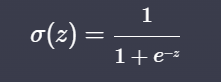 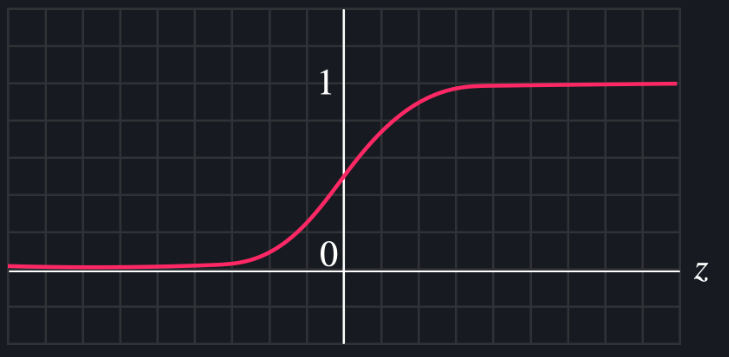
#### 기울기가 0에 가까워져서 신경망 학습에 문제가 생길 수 있음. (기울기 소실 문제)

## 2. tanh 함수 (-1과 1 사이의 값을 리턴함.)
#### 기울기 소실문제가 동일하게 발생할 수 있다.

## 3. ReLU 함수 (활성함수로 자주 사용됨)
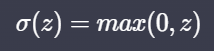 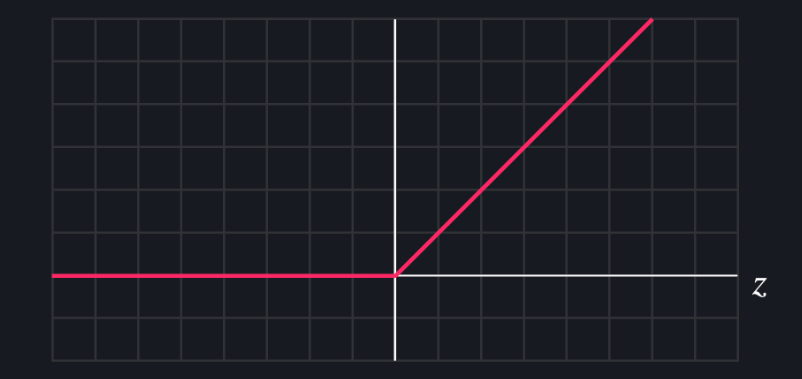
#### 기울기 소실문제가 덜 일어난다. leaktReLU를 이용해서 더 개선할 수 있다. 
#### 경사 계산이 훨씬 빠르다. (0 or 1의 기울기를 가짐)

# 출력층 활성 함수

## 1. 시그모이드 함수 (이분 분류에서 사용)
## 2. softmax 함수 (다중 분류에서 사용)
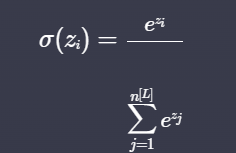
## 3. 선형 함수 (회귀 문제를 풀 때 사용)

# 신경만 손실 함수
## 회귀:
### 평균제곱오차
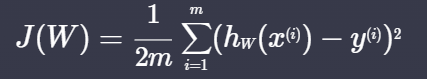
## 이분적 분류:
### 로그손실, cross entorpy
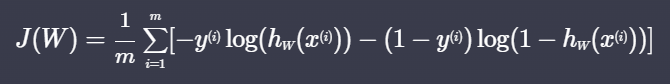
## 다중 분류:
### 로그손실
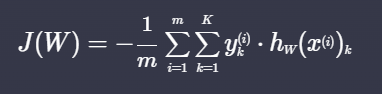

# 다양한 경사하강법 
## 배치(batch)경사 하강법 
#### 한 번 경사 하강을 할 때 모든 학습데이터를 사용
## 확률적 경사 하강법
#### 한 번 경사 하강을 할 때 임의의 데이터 한개를 사용
## 미니 배치 경사 하강법
#### 학습데이터를 임의의 같은 크기의 학습데이터로 나눈후 임의로 뽑아서 경사하강함.